In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
FILEPATH = "glass.data"
headers = ["id", "refractive index", "sodium", "magnesium", "aluminium", "silicon", "potassium", "calcium", "barium", "iron", "glass type"]
df = pd.read_csv(FILEPATH, names=headers)
df = df.drop(["id"], axis=1)
headers.pop(0)
df.head()

,refractive index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,glass type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
df.shape

(214, 10)

In [12]:
df.isnull().sum()

refractive index    0
sodium              0
magnesium           0
aluminium           0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
glass type          0
dtype: int64

Як можемо побачити, пропусків у дата сеті немає

In [13]:
df.dtypes

refractive index    float64
sodium              float64
magnesium           float64
aluminium           float64
silicon             float64
potassium           float64
calcium             float64
barium              float64
iron                float64
glass type            int64
dtype: object

<Axes: >

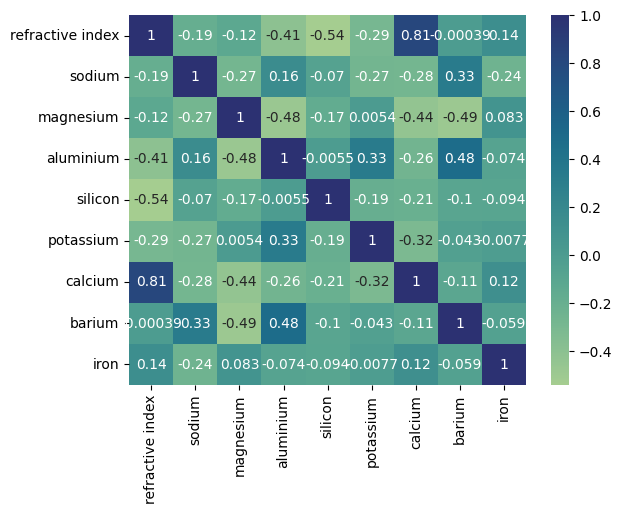

In [14]:
corr_matrix = df.drop(["glass type"], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap="crest")

# Гістограми

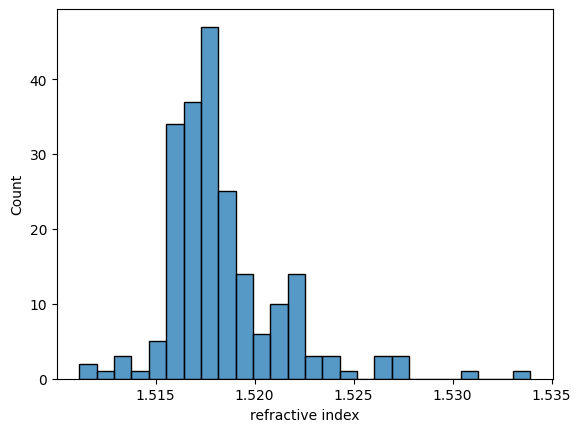

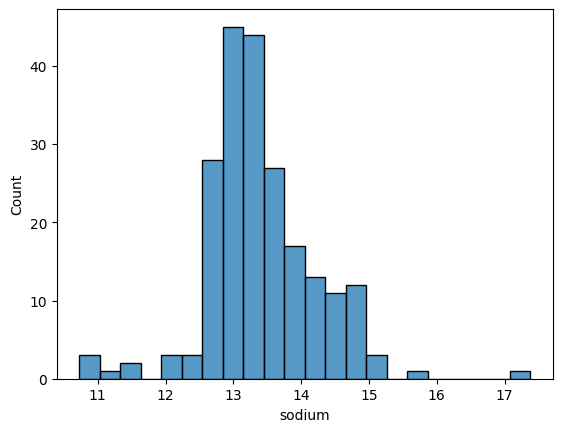

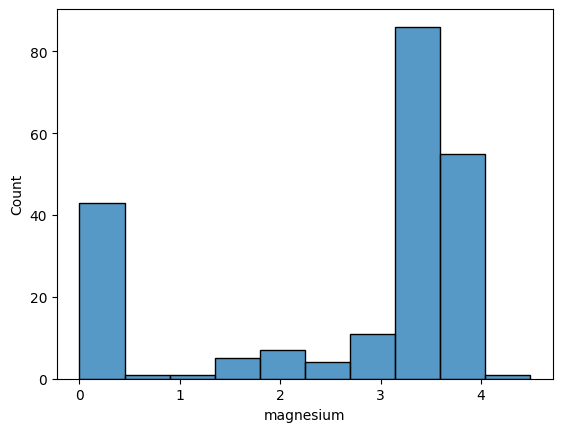

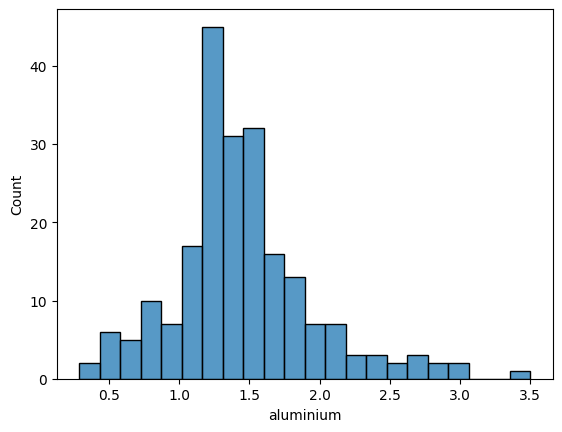

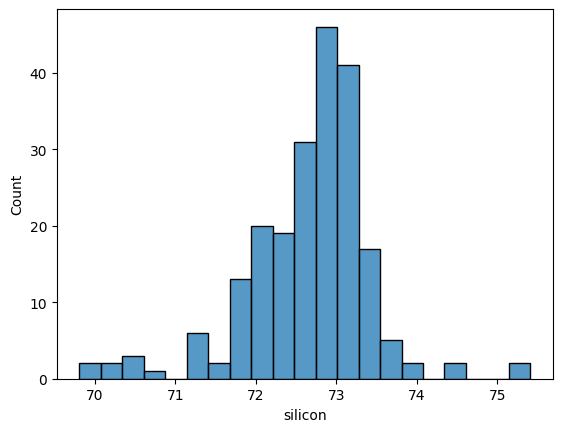

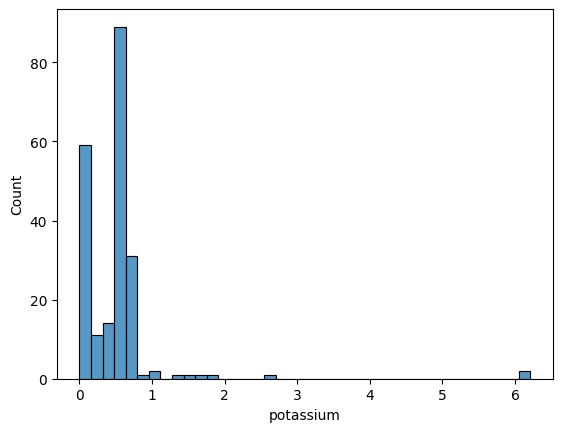

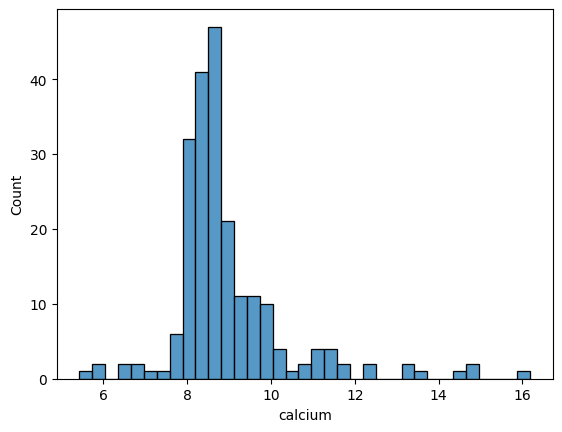

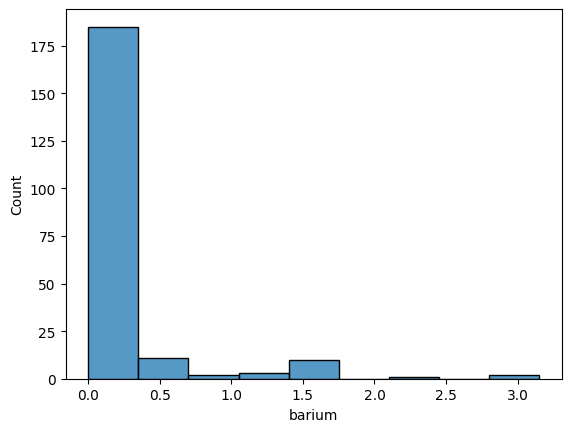

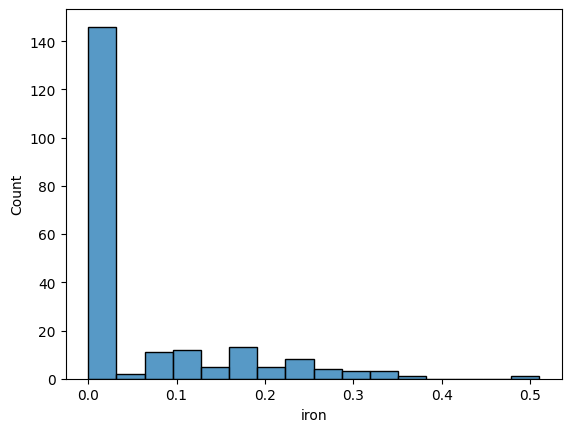

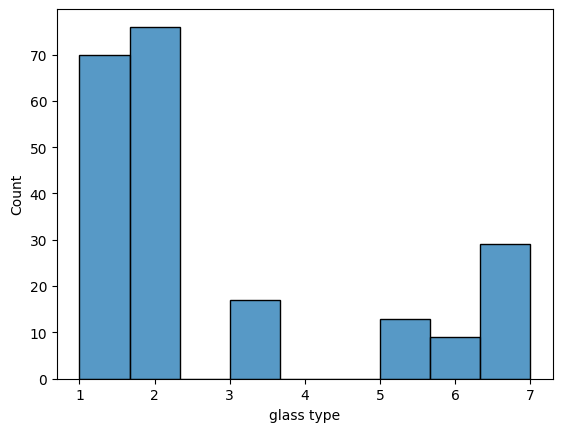

In [15]:
for i in range(len(headers)):
    figure = plt.figure()
    ax = sns.histplot(df[headers[i]])

# Boxplots
Побудуємо для деяких ознак

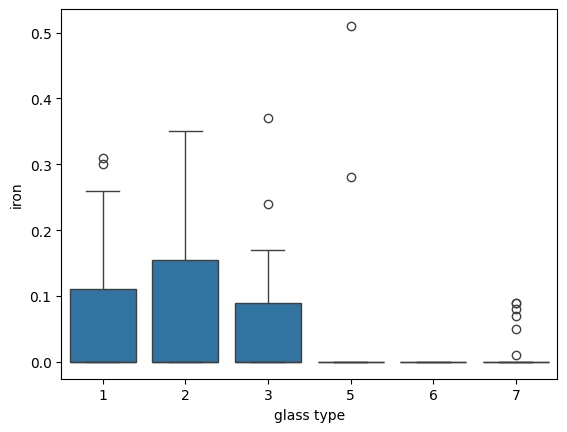

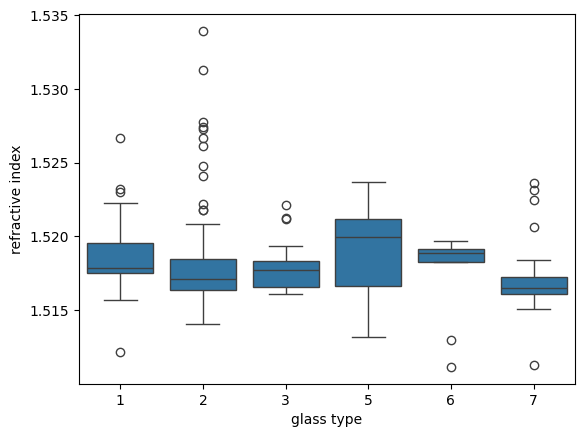

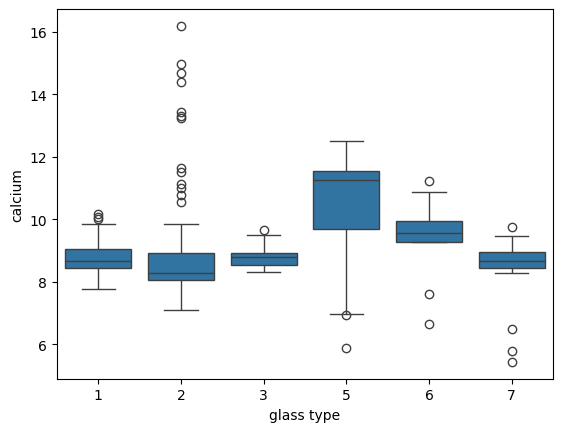

In [16]:
figure = plt.figure()
ax = sns.boxplot(x=df["glass type"], y=df["iron"])
figure = plt.figure()
ax = sns.boxplot(x=df["glass type"], y=df["refractive index"])
figure = plt.figure()
ax = sns.boxplot(x=df["glass type"], y=df["calcium"])

# Нормалізуємо дані

In [167]:
df.columns

Index(['refractive index', 'sodium', 'magnesium', 'aluminium', 'silicon',
       'potassium', 'calcium', 'barium', 'iron', 'glass type'],
      dtype='object')

In [177]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_df = pd.DataFrame(scaler.fit_transform(df.drop(["glass type"], axis=1)))
normalized_df['glass type'] = df["glass type"]

<Axes: xlabel='glass type', ylabel='Count'>

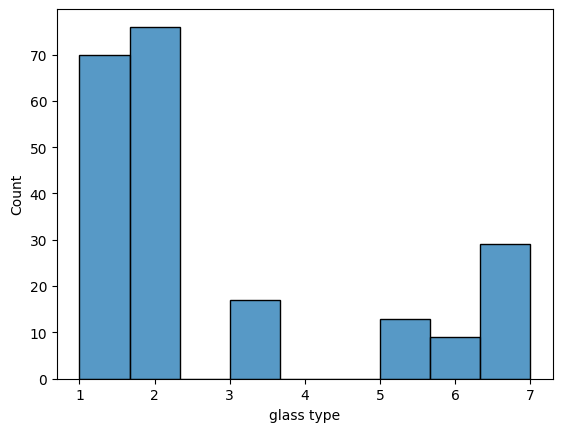

In [178]:
sns.histplot(normalized_df["glass type"]) 

# KNN

In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X = df.drop(['glass type'], axis = 1)
# Переведемо кількісний показник у якісний для класифікації
y = df['glass type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler()
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

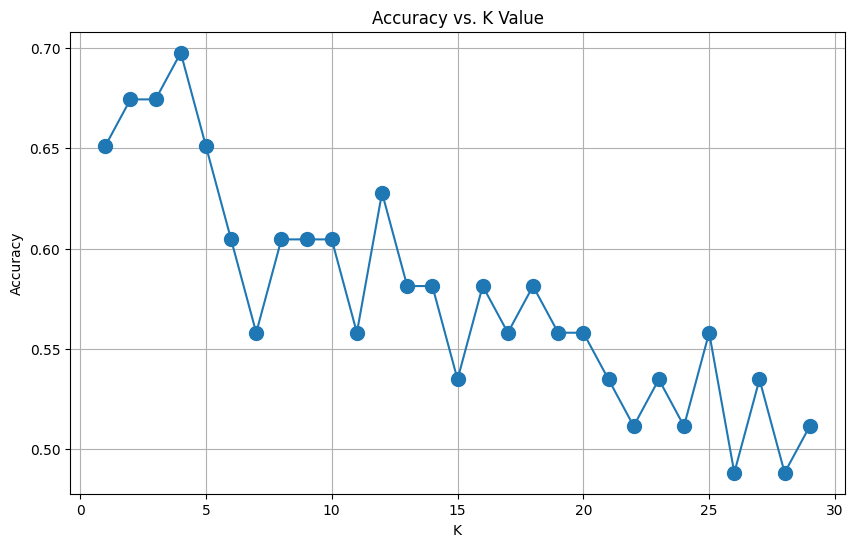

In [46]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(accuracy_score(y_test,pred_i))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

Бачимо що найбільша точність досягається при K = 4

In [48]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[ 9  0  0  0  0  0]
 [ 5 11  1  2  0  0]
 [ 3  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 1  1  0  0  0  6]]

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         9
           2       0.92      0.58      0.71        19
           3       0.50      0.25      0.33         4
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      0.75      0.86         8

    accuracy                           0.70        43
   macro avg       0.74      0.76      0.71        43
weighted avg       0.79      0.70      0.70        43



# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = df.drop(['glass type'], axis = 1)
# Переведемо кількісний показник у якісний для класифікації
y = df['glass type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))


[[11  4  1  0  0  2]
 [ 3 11  1  3  0  0]
 [ 0  1  1  0  0  0]
 [ 0  0  0  1  0  1]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  1]]

              precision    recall  f1-score   support

           1       0.79      0.61      0.69        18
           2       0.69      0.61      0.65        18
           3       0.33      0.50      0.40         2
           5       0.25      0.50      0.33         2
           6       1.00      1.00      1.00         2
           7       0.25      1.00      0.40         1

    accuracy                           0.63        43
   macro avg       0.55      0.70      0.58        43
weighted avg       0.70      0.63      0.65        43



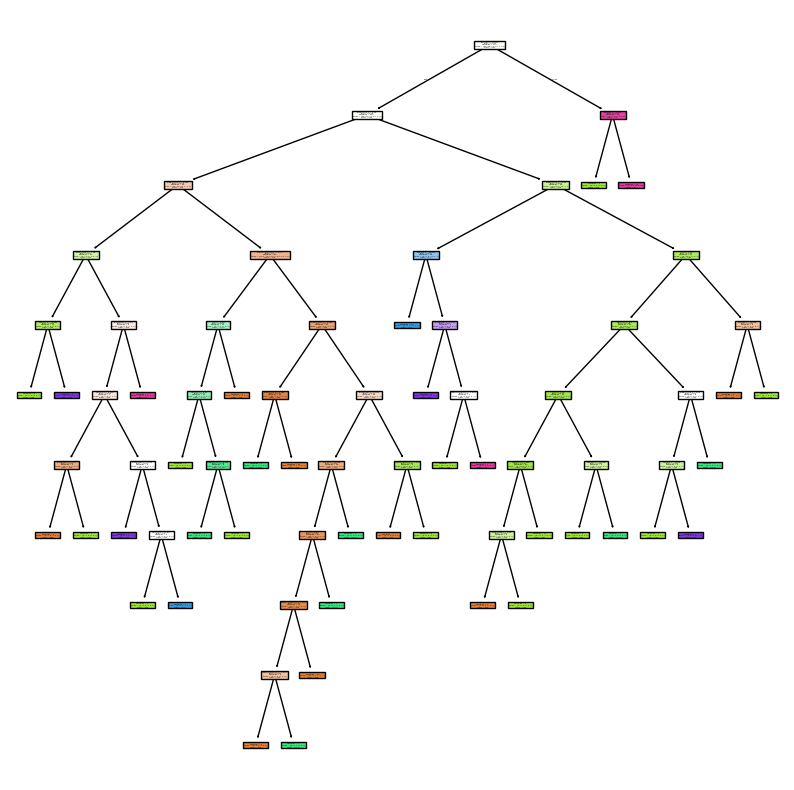

In [54]:
plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = headers, 
          class_names = ["one", "two", "three", "four", "five", "six"], filled = True)
plt.show()

# SVM

In [128]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = df.drop(['glass type'], axis = 1)
# Переведемо кількісний показник у якісний для класифікації
y = df['glass type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler()
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [129]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [130]:
grid_predictions = grid.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions))
print()
print(classification_report(y_test,grid_predictions, zero_division=0))

[[12  3  0  0  0  0]
 [ 5  8  0  0  0  0]
 [ 3  1  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 1  0  0  0  1  5]]

              precision    recall  f1-score   support

           1       0.57      0.80      0.67        15
           2       0.67      0.62      0.64        13
           3       0.00      0.00      0.00         4
           5       1.00      0.67      0.80         3
           6       0.50      1.00      0.67         1
           7       0.83      0.71      0.77         7

    accuracy                           0.65        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.62      0.65      0.62        43



# Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['glass type'], axis = 1)
# Переведемо кількісний показник у якісний для класифікації
y = df['glass type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred, zero_division=0))

[[14  2  0  0  0]
 [ 0 13  0  0  0]
 [ 4  1  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  5]]

              precision    recall  f1-score   support

           1       0.78      0.88      0.82        16
           2       0.81      1.00      0.90        13
           3       1.00      0.17      0.29         6
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         5

    accuracy                           0.84        43
   macro avg       0.92      0.81      0.80        43
weighted avg       0.86      0.84      0.80        43



# AdaBoost

In [162]:
from sklearn.ensemble import AdaBoostClassifier

X = df.drop(['glass type'], axis = 1)
# Переведемо кількісний показник у якісний для класифікації
y = df['glass type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=300, learning_rate=1, algorithm="SAMME")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred, zero_division=0))

[[11  4  1  0  0  0]
 [ 1  9  0  1  1  0]
 [ 1  2  2  0  0  0]
 [ 0  0  0  2  0  0]
 [ 1  1  0  0  0  1]
 [ 0  0  0  0  0  5]]

              precision    recall  f1-score   support

           1       0.79      0.69      0.73        16
           2       0.56      0.75      0.64        12
           3       0.67      0.40      0.50         5
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         3
           7       0.83      1.00      0.91         5

    accuracy                           0.67        43
   macro avg       0.59      0.64      0.60        43
weighted avg       0.65      0.67      0.65        43

